In [215]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")
import tensorflow as tf
from tensorflow import keras
import sklearn

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import svm
from sklearn.svm import SVC
from sklearn import model_selection
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [217]:
data = pd.read_csv("gamma.csv", converters={'class': lambda x: int(x == 'h')})
data

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,78.5819,20.0958,3.0137,0.1531,0.0790,13.8150,62.8954,-11.0144,4.0670,199.8640,0
1,44.7025,17.2750,2.8820,0.3005,0.1568,39.1008,31.9774,15.3809,14.5058,177.1620,0
2,53.3458,10.3460,2.5347,0.5577,0.3285,-61.4294,-29.9526,-5.2151,7.4932,300.9070,0
3,38.5054,20.5728,3.0434,0.2371,0.1235,-10.5779,28.6940,-8.6808,18.3976,146.3720,0
4,12.8950,11.2392,2.1477,0.7260,0.4377,14.5944,-8.0421,6.6514,80.9568,150.9220,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,20.4074,8.6738,2.0779,0.7406,0.4451,-21.2419,20.2151,-8.2311,36.9080,221.4876,1
9996,15.5072,6.8242,2.4829,0.6901,0.3586,5.4648,9.3832,-8.8667,57.2055,221.0643,1
9997,30.1788,10.6125,2.4771,0.4600,0.2383,23.7772,16.4568,-8.6961,80.6957,156.6080,1
9998,101.4200,18.7524,3.1920,0.1748,0.0993,49.1508,23.7505,10.9015,71.0938,249.6320,1


In [218]:
variables = ["Length","Width","Size","Conc","Conc1","Asym","M3Long","M3Trans","Alpha","Dist"]
X=data[variables]
y=data["class"]

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
#X_val and y_val is used to tune the hyperparamters

In [220]:
X2= X.values
y1= y.values

In [221]:
#LOGISTIC REGRESSION

In [222]:
X_lg = X_train
y_lg = y_train

In [223]:
logreg=LogisticRegression(max_iter=5000)
logreg.fit(X_lg,y_lg)

LogisticRegression(max_iter=5000)

In [224]:
y_pred=logreg.predict(X_lg)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [225]:
score=logreg.score(X_lg,y_lg)
score

0.7621111111111111

In [226]:
cm=metrics.confusion_matrix(y_lg,y_pred) 
cm

array([[3663,  842],
       [1299, 3196]])

In [227]:
logreg=LogisticRegression(max_iter=5000)
logreg.fit(X_lg,y_lg)
y_pred2=logreg.predict(X_lg)

In [228]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accuracy

0.7621111111111111

In [229]:
kf=KFold(n_splits=10, shuffle=True)
scores = cross_val_score(logreg, X_lg, y_lg, cv=kf)
scores

array([0.74888889, 0.74666667, 0.77333333, 0.76222222, 0.76777778,
       0.77111111, 0.76333333, 0.77555556, 0.76      , 0.74888889])

In [230]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7466666666666667, 0.7617777777777779, 0.7755555555555556)

In [231]:
logreg.score(X_test, y_test)

0.757

In [232]:
#DISCRIMINANT ANALYSIS

In [233]:
X_da = X_train.values
y_da = y_train.values

In [234]:
X_da_test = X_test.values
y_da_test = y_test.values

In [235]:
lda=LDA(store_covariance=True)
lda.fit(X_da,y_da)

LinearDiscriminantAnalysis(store_covariance=True)

In [236]:
lda.scalings_

array([[ 1.29273281e-02],
       [-3.02343815e-03],
       [ 5.85197752e-01],
       [-2.11655732e-01],
       [ 3.91128767e+00],
       [-4.11005660e-04],
       [-1.98470486e-03],
       [-4.15523348e-05],
       [ 3.55318560e-02],
       [ 1.51353338e-03]])

In [237]:
lda.explained_variance_ratio_

array([1.])

In [238]:
lda.covariance_

array([[ 2.02992821e+03,  6.92340138e+02,  1.50692444e+01,
        -5.47414893e+00, -3.18618487e+00, -1.06135794e+03,
        -4.04580814e+02,  1.26992526e+01, -1.28268845e+02,
         1.35944868e+03],
       [ 6.92340138e+02,  4.11893408e+02,  6.94850650e+00,
        -2.35879002e+00, -1.37612821e+00, -3.32164920e+02,
        -2.24669117e+02,  1.75253973e+01, -1.21988569e+01,
         5.28699159e+02],
       [ 1.50692444e+01,  6.94850650e+00,  2.21014728e-01,
        -7.37907392e-02, -4.28385352e-02, -5.75957181e+00,
         4.16869401e-01,  1.87826217e-01, -2.30336085e+00,
         1.55137760e+01],
       [-5.47414893e+00, -2.35879002e+00, -7.37907392e-02,
         3.40848780e-02,  2.02803742e-02,  1.73914512e+00,
        -5.09447568e-01, -3.66783985e-02,  8.87666398e-01,
        -4.52166479e+00],
       [-3.18618487e+00, -1.37612821e+00, -4.28385352e-02,
         2.02803742e-02,  1.26698103e-02,  9.78148153e-01,
        -2.91867207e-01, -2.35775663e-02,  5.02911398e-01,
        -2.

In [239]:
y_pred=lda.fit(X_da,y_da).predict(X_da_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [240]:
y_predprob=lda.fit(X_da,y_da).predict_proba(X_da_test)
y_predprob

array([[0.08463231, 0.91536769],
       [0.76717335, 0.23282665],
       [0.40976566, 0.59023434],
       ...,
       [0.0605081 , 0.9394919 ],
       [0.0606545 , 0.9393455 ],
       [0.69867634, 0.30132366]])

In [241]:
X_da,y_da

(array([[128.627 ,  21.6801,   2.7749, ..., -11.5924,   3.1073, 221.05  ],
        [ 38.5054,  20.5728,   3.0434, ...,  -8.6808,  18.3976, 146.372 ],
        [151.944 ,  50.3368,   3.3734, ..., -29.3757,  56.64  , 203.853 ],
        ...,
        [ 72.8104,  14.3361,   3.096 , ...,  -5.9832,   0.644 , 286.265 ],
        [ 72.926 ,  24.6827,   3.363 , ..., -18.5071,   3.3709, 251.882 ],
        [ 38.5942,  28.2244,   2.839 , ...,  23.7012,  35.4255, 213.8245]]),
 array([1, 0, 1, ..., 0, 0, 1]))

In [242]:
y_pred=lda.fit(X_da,y_da).predict(X_da)
y_da-y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [243]:
metrics.accuracy_score(y_pred, y_da)

0.7636666666666667

In [244]:
scores = cross_val_score(estimator=lda,X=X_da,y=y_da,cv=kf,scoring ="accuracy") # is split using k-fold with 5 splits

In [245]:
scores

array([0.75666667, 0.76      , 0.76222222, 0.78222222, 0.77444444,
       0.76      , 0.76      , 0.75888889, 0.76666667, 0.75333333])

In [246]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7533333333333333, 0.7634444444444444, 0.7822222222222223)

In [247]:
y_test_pred = lda.predict(X_da_test)

In [248]:
lda.score(X_da_test, y_da_test)

0.748

In [249]:
#DECISION TREES

In [250]:
X_dt = X_train.values
y_dt = y_train.values
X_dt_test = X_test.values
y_dt_test = y_test.values

In [251]:
treeclf=DecisionTreeClassifier(max_depth=4)
treeclf.fit(X_dt,y_dt)

DecisionTreeClassifier(max_depth=4)

In [252]:
treeclf.feature_importances_

array([0.30632238, 0.06289285, 0.0580482 , 0.0218091 , 0.        ,
       0.        , 0.01886954, 0.        , 0.53205793, 0.        ])

In [253]:
yhat=treeclf.predict(X_dt)
yhat

array([1, 0, 1, ..., 0, 0, 1])

In [254]:
metrics.accuracy_score(y_dt,yhat)

0.7812222222222223

In [255]:
dot_data=export_graphviz(treeclf,out_file="treeclf.dot",feature_names=variables)

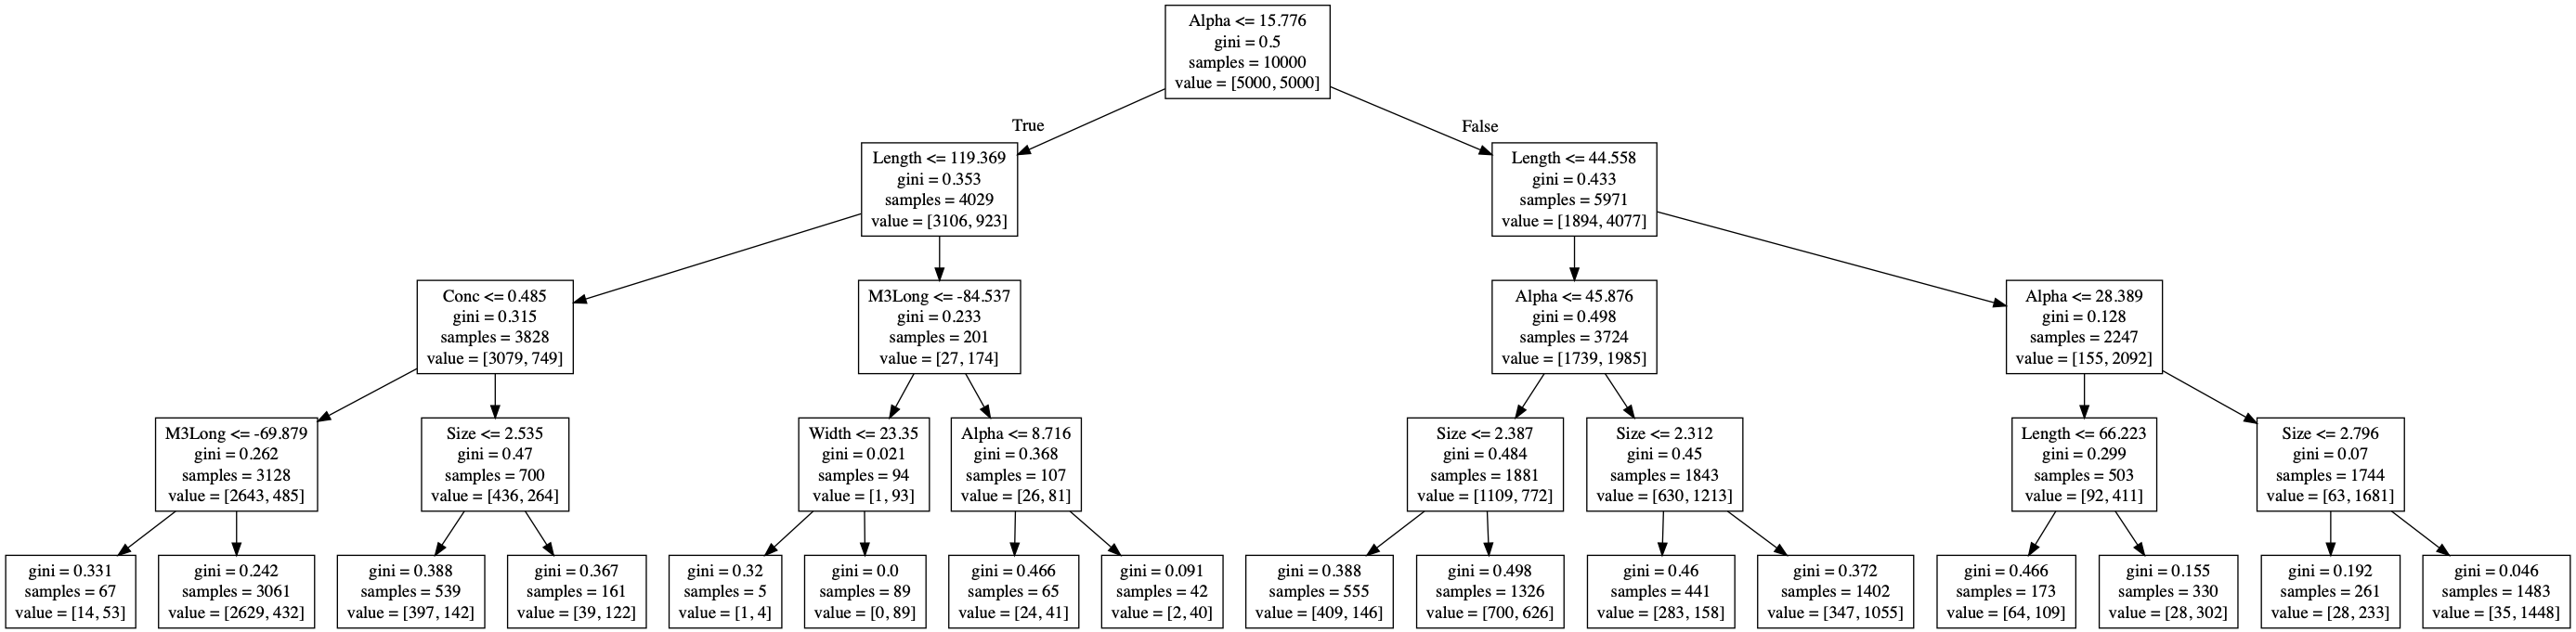

In [256]:
Image("treeclf.png")

In [257]:
yhat=treeclf.predict(X_dt)
metrics.mean_squared_error(yhat,y_dt)

0.21877777777777777

In [258]:
treeclf=DecisionTreeClassifier(max_depth=10)
treeclf=treeclf.fit(X_dt,y_dt)

In [259]:
y_dt_pred=treeclf.predict(X_dt_test)
y_dt_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [260]:
metrics.accuracy_score(y_dt_test,y_dt_pred)

0.801

In [261]:
kf=KFold(n_splits=10, shuffle=True)
np.mean(cross_val_score(treeclf, X_dt, y_dt, cv=10))

0.8149999999999998

In [262]:
#Random Forests

In [263]:
X_rf = X_train.values
y_rf = y_train.values
X_rf_test = X_test.values
y_rf_test = y_test.values

In [264]:
yarr=np.ravel(y_rf)
yarr_test=np.ravel(y_rf_test)

In [265]:
rfclf=RandomForestClassifier(n_estimators=50, max_depth=15) 
rfclf.fit(X_rf,y_rf)

RandomForestClassifier(max_depth=15, n_estimators=50)

In [266]:
#param_grid = {
            #  'max_depth': [3, 4, 7, 9, 15,20,25]
            # }

In [267]:
#grid_clf = GridSearchCV(rfclf, param_grid, cv=10)
#grid_clf.fit(X_rf,y_rf)

In [268]:
#grid_clf.best_estimator_

In [269]:
rfclf2=RandomForestClassifier(n_estimators=50, max_depth=27) 
rfclf2.fit(X_rf,y_rf)

RandomForestClassifier(max_depth=27, n_estimators=50)

In [270]:
rfclf2.feature_importances_

array([0.13484373, 0.11167681, 0.11432953, 0.06145469, 0.05884886,
       0.05110148, 0.0830102 , 0.05371885, 0.2619164 , 0.06909944])

In [271]:
yhat=rfclf2.predict(X_rf)
yhat

array([1, 0, 1, ..., 0, 0, 1])

In [272]:
cm=metrics.confusion_matrix(yhat,y_rf)
cm

array([[4505,    2],
       [   0, 4493]])

In [273]:
y_pred_test = rfclf2.predict(X_rf_test)
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [274]:
metrics.accuracy_score(yarr_test, y_pred_test)

0.844

In [275]:
print(classification_report(yarr_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       495
           1       0.89      0.79      0.84       505

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



In [276]:
kf=KFold(n_splits=10, shuffle=True)
np.mean(cross_val_score(rfclf, X_rf, yarr, cv=10))

0.8523333333333334

In [277]:
#GRADIENT BOOSTING

In [278]:
X_gb = X_train.values
y_gb = y_train.values
X_gb_test = X_test.values
y_gb_test = y_test.values

In [279]:
#yarr_gb=np.ravel(y_gb)
#yarr_gb_test=np.ravel(y_gb_test)

In [280]:
gbc=GradientBoostingClassifier(n_estimators=50, max_depth=15)
gbc.fit(X_gb,y_gb)

GradientBoostingClassifier(max_depth=15, n_estimators=50)

In [281]:
param_test = {'max_depth':range(5,20,2), 'min_samples_split':range(200,1001,200)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,random_state=10), 
                                                              param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [282]:
gsearch.fit(X_gb,y_gb)

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=10),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 20, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')

In [283]:
gsearch.best_params_, gsearch.best_score_

({'max_depth': 17, 'min_samples_split': 200}, 0.925284352202904)

In [284]:
gbc=GradientBoostingClassifier(n_estimators=50, max_depth=17, min_samples_split=400)
gbc.fit(X_gb,y_gb)

GradientBoostingClassifier(max_depth=17, min_samples_split=400, n_estimators=50)

In [285]:
predictions = gbc.predict(X_gb)
predictions

array([1, 0, 1, ..., 0, 0, 1])

In [286]:
metrics.confusion_matrix(predictions,y_gb)

array([[4277,  474],
       [ 228, 4021]])

In [287]:
TESTpredictions = gbc.predict(X_gb_test)

In [288]:
metrics.accuracy_score(TESTpredictions, y_gb_test)

0.834

In [289]:
kf=KFold(n_splits=10, shuffle=True)
np.mean(cross_val_score(gbc, X_gb, y_gb, cv=10))

0.8503333333333334

In [290]:
xgbclf=XGBClassifier()
xgbclf.fit(X_gb,y_gb)

XGBClassifier()

In [291]:
yhat=xgbclf.predict(X_gb)
cm=metrics.confusion_matrix(yhat,y_gb)
cm

array([[4092,  795],
       [ 413, 3700]])

In [292]:
xgbclf.feature_importances_

array([0.15862542, 0.0840998 , 0.08257863, 0.07248376, 0.05350906,
       0.03070348, 0.08714349, 0.02994645, 0.33309186, 0.067818  ],
      dtype=float32)

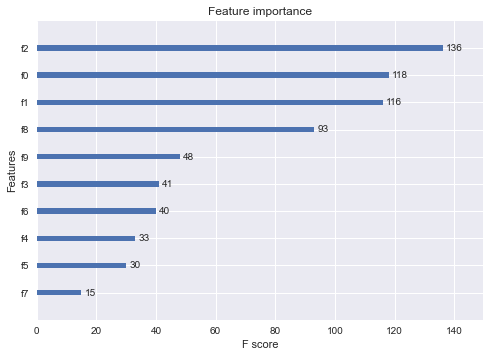

In [293]:
ax = plot_importance(xgbclf)

In [294]:
ax.figure.savefig('importance.png')

In [295]:
#features 1,2,0 and 8 have the highest importance.

In [296]:
yhat1=xgbclf.predict(X_gb_test)

In [297]:
metrics.accuracy_score(yhat1,y_gb_test)

0.83

In [298]:
xgbclf2=XGBClassifier(random_state=7)

In [299]:
kf=KFold(n_splits=10, shuffle=True)
cval=cross_val_score(xgbclf2, X2, y1, cv=kf)

In [300]:
np.mean(cval)

0.8449

In [301]:
#SUPPORT VECTOR MACHINES

In [302]:
X_svm = X_train.values
y_svm = y_train.values
X_svm_test = X_test.values
y_svm_test = y_test.values

In [303]:
X_svm_VAL=X_svm[7000:]
X_svm_train=X_svm[:7000]
y_svm_VAL=y_svm[7000:]
y_svm_train=y_svm[:7000]

In [304]:
clf = svm.SVC(kernel='linear', C=1)

In [305]:
#parameters={"C":[1,10],"gamma":(0.1,0.5,1,2)}
#tuneclf=GridSearchCV(clf,parameters,cv=5)
#tuneclf.fit(X_svm_train, y_svm_train)
#took too long

In [306]:
#tuneclf.best_estimator_

In [307]:
#tuneclf.best_score_

In [308]:
#clf.fit(X_svm_train, y_svm_train)

In [309]:
#clf.fit(X_svm_VAL, y_svm_VAL)

In [310]:
clf2 = svm.SVC(kernel='polynomial', C=1)

In [311]:
#parameters={"C":[1,10],"gamma":(0.1,0.5,1,2)}
#tuneclf=GridSearchCV(clf2,parameters,cv=5)
#tuneclf.fit(X_svm_train, y_svm_train)
#took too long

In [312]:
#tuneclf.best_estimator_

In [313]:
#tuneclf.best_score_

In [314]:
#clf.fit(X_svm_train, y_svm_train)

In [315]:
#clf2.fit(X_svm_VAL, y_svm_VAL)

In [316]:
clf3 = svm.SVC(kernel='rbf', C=10, gamma=0.1)

In [317]:
#parameters={"C":[1,10],"gamma":(0.1,0.5,1,2)}
#tuneclf=GridSearchCV(clf3,parameters,cv=5)
#tuneclf.fit(X_svm_train, y_svm_train)
#took too long

In [318]:
#tuneclf.best_estimator_

In [319]:
#tuneclf.best_score_

In [320]:
#clf.fit(X_svm_train, y_svm_train)

In [321]:
#clf3.fit(X_svm_VAL, y_svm_VAL)

In [322]:
#X_TEST_pred = clf.predict(X_svm_test)
#X_TEST_pred

In [323]:
#clf.score(X_svm_test, y_svm_test)

In [324]:
#scores_res = model_selection.cross_val_score(clf,X2, y1, cv=5)
#scores_res

In [ ]:
#this was commented out because the grid search and fitting took too long.

In [325]:
#NEURAL NETWORKS

In [326]:
X_NN = X_train.values
y_NN = y_train.values
X_NN_test = X_test.values
y_NN_test = y_test.values

In [327]:
X_NaN = np.ones(np.shape(X_NN))
for i in range(10):
    X_NaN[:,i] = X_NN[:,i] - X_NN[:,i].min()
    X_NaN[:,i] = X_NaN[:,i] / X_NaN[:,i].max()

In [328]:
X_NaN_test = np.ones(np.shape(X_NN_test))
for i in range(10):
    X_NaN_test[:,i] = X_NN_test[:,i] - X_NN_test[:,i].min()
    X_NaN_test[:,i] = X_NaN_test[:,i] / X_NaN_test[:,i].max()

In [329]:
X_NN_VAL=X_NaN[7000:]
X_train_part=X_NaN[:7000]
y_NN_VAL=y_NN[7000:]
y_train_part=y_NN[:7000]
#the val sets are to be used when evaluating each model and will not be used in the taining at all.
#x train part and y train part are the sets to train the models.
y_NN_VAL

array([1, 1, 1, ..., 0, 0, 1])

In [349]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(45, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [331]:
#batch_size=[10,20,40,60,80,100]
#epochs=[10,50,100]
#param_grid=dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
#grid_result=grid.fit(X_train_part, y_train_part)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    
#GRID SEARCH FOR EPOCHS AND BATCH SIZE

In [350]:
history=model.fit(X_train_part, y_train_part, epochs=100, batch_size=20, validation_data=(X_NN_VAL,y_NN_VAL))

Train on 7000 samples, validate on 2000 samples
Epoch 1/100
7000/7000 [==============================] - 4s 629us/step - loss: 0.5398 - accuracy: 0.7280 - val_loss: 0.4474 - val_accuracy: 0.7935
Epoch 2/100
7000/7000 [==============================] - 2s 264us/step - loss: 0.4600 - accuracy: 0.7811 - val_loss: 0.4442 - val_accuracy: 0.7895
Epoch 3/100
7000/7000 [==============================] - 2s 260us/step - loss: 0.4445 - accuracy: 0.7899 - val_loss: 0.4098 - val_accuracy: 0.8130
Epoch 4/100
7000/7000 [==============================] - 2s 322us/step - loss: 0.4366 - accuracy: 0.7967 - val_loss: 0.4139 - val_accuracy: 0.8070
Epoch 5/100
7000/7000 [==============================] - 2s 306us/step - loss: 0.4299 - accuracy: 0.7997 - val_loss: 0.4015 - val_accuracy: 0.8175
Epoch 6/100
7000/7000 [==============================] - 2s 239us/step - loss: 0.4242 - accuracy: 0.8046 - val_loss: 0.4000 - val_accuracy: 0.8150
Epoch 7/100
7000/7000 [==============================] - 2s 236us/step

In [353]:
loss=history.history["loss"]
acc=history.history["accuracy"]
val_loss=history.history["val_loss"]
val_acc=history.history["val_accuracy"]
epochs=range(1,len(acc)+1)

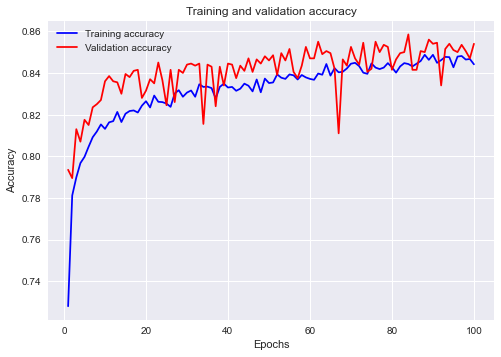

In [354]:
plt.plot(epochs,acc,"b",label="Training accuracy") 
plt.plot(epochs,val_acc,"r",label="Validation accuracy") 
plt.title("Training and validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('accuracy_val.png')

In [351]:
test_loss, test_acc = model.evaluate(X_NaN_test, y_NN_test)
print('Test accuracy:', test_acc)

1000/1000 [==============================] - 0s 78us/step
Test accuracy: 0.796999990940094
